## Imports

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

## Train

In [51]:
train_set = pd.read_csv('train/train_encoded.csv')
train_set.head(10)

,id,len_keyword,len_location,len_text,len_text_original,diff_len_text,keyword_sum,keyword_min,keyword_max,keyword_mean,...,text_min_tf-idf,text_max_tf-idf,text_mean_tf-idf,text_median_tf-idf,text_sum_w2v,text_min_w2v,text_max_w2v,text_mean_w2v,text_median_w2v,target
0,1,0.0,0.0,68,69,1,1.0,1.0,1.0,1.0,...,0.099866,0.430347,0.257765,0.249176,11.683651,-0.018116,0.615265,0.177025,0.150866,1
1,4,0.0,0.0,38,38,0,1.0,1.0,1.0,1.0,...,0.227820,0.504613,0.365052,0.347656,0.790154,-0.103024,0.308946,0.079015,0.055061,1
2,5,0.0,0.0,131,133,2,1.0,1.0,1.0,1.0,...,0.074545,0.497279,0.232038,0.219919,32.468316,-0.044882,1.000000,0.154611,0.113670,1
3,6,0.0,0.0,63,65,2,1.0,1.0,1.0,1.0,...,0.128410,0.484991,0.335797,0.356367,1.943116,-0.039545,0.317247,0.092529,0.078856,1
4,7,0.0,0.0,86,88,2,1.0,1.0,1.0,1.0,...,0.096273,0.390788,0.248369,0.241596,13.153737,-0.041156,1.000000,0.125274,0.086994,1
5,8,0.0,0.0,105,110,5,1.0,1.0,1.0,1.0,...,0.089499,0.363373,0.238811,0.245703,6.677405,-0.093557,0.478663,0.101173,0.080587,1
6,10,0.0,0.0,92,95,3,1.0,1.0,1.0,1.0,...,0.096857,0.393245,0.255461,0.272769,9.341228,-0.047981,0.788929,0.141534,0.109943,1
7,13,0.0,0.0,60,59,-1,1.0,1.0,1.0,1.0,...,0.128963,0.487079,0.246268,0.228644,12.705849,-0.018808,1.000000,0.162896,0.129083,1
8,14,0.0,0.0,80,79,-1,1.0,1.0,1.0,1.0,...,0.131362,0.399979,0.272497,0.254940,15.609978,-0.033696,1.000000,0.200128,0.158737,1
9,15,0.0,0.0,53,52,-1,1.0,1.0,1.0,1.0,...,0.130843,0.507948,0.277341,0.259876,7.238668,0.004347,0.526257,0.160859,0.136866,1


In [52]:
train_set.drop('id', axis=1, inplace=True)

### Random Forest

In [53]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Search

In [55]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100]
max_features = ['auto'] #'log2'
max_depth = [20, 50, 70]
min_samples_split = [5, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=111)

In [57]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [20, 50, 70],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 50, 100],
                                        'n_estimators': [20, 50, 70, 100]},
                   random_state=111)

In [58]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 50,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 70}

In [59]:
preds = rf_random.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.779822


In [68]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=20, max_depth=20)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.784518


In [74]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.788364


In [73]:
rf_model = RandomForestClassifier(n_estimators=70, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.781814


0.789734

In [71]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.780220


In [72]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.785374


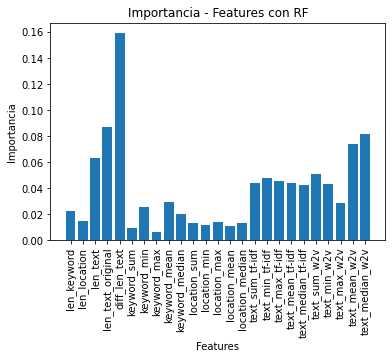

In [75]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

### Test

In [76]:
test_set = pd.read_csv('test/test_encoded.csv')

In [77]:
col_id = test_set['id']
test_set.drop('id', axis=1, inplace=True)

In [78]:
test_set.head(10)

,len_keyword,len_location,len_text,len_text_original,diff_len_text,keyword_sum,keyword_min,keyword_max,keyword_mean,keyword_median,...,text_sum_tf-idf,text_min_tf-idf,text_max_tf-idf,text_mean_tf-idf,text_median_tf-idf,text_sum_w2v,text_min_w2v,text_max_w2v,text_mean_w2v,text_median_w2v
0,0.0,0.0,34,34,0,1.0,1.0,1.0,1.0,1.0,...,2.350852,0.188729,0.539327,0.391809,0.405420,2.615612,0.123642,0.416246,0.261561,0.253108
1,0.0,0.0,62,64,2,1.0,1.0,1.0,1.0,1.0,...,2.907499,0.134557,0.424909,0.323055,0.335907,4.601476,0.020386,0.308944,0.127819,0.103810
2,0.0,0.0,94,96,2,1.0,1.0,1.0,1.0,1.0,...,3.829908,0.087343,0.366435,0.212773,0.202162,18.687548,-0.060702,0.536185,0.122141,0.104698
3,0.0,0.0,38,40,2,1.0,1.0,1.0,1.0,1.0,...,1.977999,0.387866,0.583183,0.494500,0.503475,0.390538,0.065934,0.175728,0.130179,0.148877
4,0.0,0.0,45,45,0,1.0,1.0,1.0,1.0,1.0,...,2.676265,0.145303,0.467023,0.334533,0.357812,0.780736,-0.023094,0.283668,0.078074,0.060852
5,0.0,0.0,36,34,-2,1.0,1.0,1.0,1.0,1.0,...,2.433109,0.184247,0.661802,0.347587,0.311464,3.261046,-0.091945,0.536185,0.155288,0.093425
6,0.0,0.0,73,72,-1,1.0,1.0,1.0,1.0,1.0,...,3.780986,0.177587,0.639809,0.290845,0.219339,15.150403,-0.038854,1.000000,0.194236,0.143367
7,0.0,0.0,15,17,2,1.0,1.0,1.0,1.0,1.0,...,1.908290,0.351061,0.726570,0.477073,0.415329,1.542290,0.097143,0.555028,0.257048,0.215696
8,0.0,0.0,15,16,1,1.0,1.0,1.0,1.0,1.0,...,1.884570,0.223933,0.653736,0.471142,0.503450,0.549909,0.086593,0.273800,0.183303,0.189516
9,0.0,0.0,8,9,1,1.0,1.0,1.0,1.0,1.0,...,1.406949,0.631894,0.775055,0.703474,0.703474,0.164787,0.164787,0.164787,0.164787,0.164787


# PROBAR CON BEST_PARAMS

In [79]:
preds = rf_model.predict(test_set)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
print(len(preds))
test_set['target'] = preds
test_set['id'] = col_id
test_set[['id', 'target']]

3263


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


### Resultado

In [81]:
test_set[['id', 'target']].to_csv('result_rf_encoded.csv', header=True, index=False)

## Text w2v

## Train

In [2]:
train_set = pd.read_csv('train/text_encoded_w2v.csv')
train_set.head(10)

,id,text_sum,text_min,text_max,text_mean,text_median,target
0,1,1.100006,0.004267,0.261477,0.110001,0.108159,1
1,4,1.312549,-0.103024,0.308946,0.087503,0.093828,1
2,5,6.537887,-0.029605,1.000000,0.145286,0.099503,1
3,6,1.225229,0.001371,0.300471,0.122523,0.077621,1
4,7,2.055524,-0.059800,0.332519,0.097882,0.074613,1
5,8,1.770825,-0.060205,0.273306,0.049190,0.040129,1
6,10,5.151926,-0.028055,1.000000,0.143109,0.098941,1
7,13,0.790631,-0.039936,0.178667,0.079063,0.080440,1
8,14,1.052949,-0.027161,0.223943,0.105295,0.103054,1
9,15,0.775155,0.025716,0.260719,0.129193,0.106400,1


In [17]:
train_set.drop('id', axis=1, inplace=True)

### Random Forest

In [18]:
X, y = train_set.iloc[:,:-1],train_set.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [20, 50, 70, 100]
max_features = ['auto'] #'log2'
max_depth = [20, 50, 70]
min_samples_split = [5, 50, 100]
min_samples_leaf = [20]

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [21]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),\
                               param_distributions=random_search, n_iter=30, cv=7, random_state=111)

In [22]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [20, 50, 70],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [5, 50, 100],
                                        'n_estimators': [20, 50, 70, 100]},
                   random_state=111)

In [23]:
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 70}

In [24]:
preds = rf_random.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score %f" % (f1))

F1-Mean Score 0.695411


In [25]:
rf_model = RandomForestClassifier(n_estimators=70, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.697627


In [26]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.691294


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=50, min_samples_leaf=20, max_depth=70)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.686626


In [28]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=70, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.718371


In [29]:
rf_model = RandomForestClassifier(n_estimators=57, min_samples_split=4, max_depth=30, min_samples_leaf=5, random_state=111)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = np.sqrt(f1_score(y_test, preds))
print("F1-Mean Score: %f" % (f1))

F1-Mean Score: 0.712376


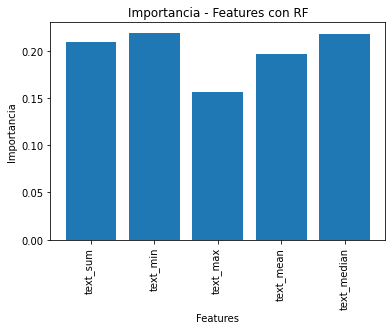

In [30]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()